## 삼성 주식 EDA 포트폴리오

In [44]:
# 라이브러리  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# 데이터 읽기

data = pd.read_csv('Samsung.csv')

data['Date'] = pd.to_datetime(data['Date'])

print(data.head(25))

         Date    Open    High     Low   Close    Adj Close     Volume
0  2000-01-04  6000.0  6110.0  5660.0  6110.0  4651.737793   74195000
1  2000-01-05  5800.0  6060.0  5520.0  5580.0  4248.232422   74680000
2  2000-01-06  5750.0  5780.0  5580.0  5620.0  4278.686523   54390000
3  2000-01-07  5560.0  5670.0  5360.0  5540.0  4217.780273   40305000
4  2000-01-10  5600.0  5770.0  5580.0  5770.0  4392.884766   46880000
5  2000-01-11  5820.0  6100.0  5770.0  5770.0  4392.884766   59745000
6  2000-01-12  5610.0  5740.0  5600.0  5720.0  4354.818359   29220000
7  2000-01-13  5600.0  5740.0  5560.0  5710.0  4347.205078   41190000
8  2000-01-14  5720.0  5880.0  5680.0  5830.0  4438.565918   49375000
9  2000-01-17  6000.0  6180.0  5920.0  6100.0  4644.125000   63505000
10 2000-01-18  6160.0  6160.0  5980.0  6100.0  4644.125000   45260000
11 2000-01-19  6000.0  6040.0  5960.0  5960.0  4537.538574   40205000
12 2000-01-20  5860.0  6040.0  5820.0  6040.0  4598.444824   37315000
13 2000-01-21  5950.

In [46]:
# 결측값 확인 

print(data.isnull().sum())

# 결측값 Nan은 없으나 거래량이 0인 날짜 발견

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [52]:
# 연도-월 정보만 따로 추출

data['Year_Month'] = data['Date'].dt.to_period('M')

# 월별 평균 거래량 계산

vol_month_Mu = data[data['Volume']>0].groupby('Year_Month')['Volume'].mean().reset_index()

# yearmonth 추가 확인용
# print(data.tail(5))


           Date     Open     High      Low    Close  Adj Close    Volume  \
5616 2022-05-17  66600.0  67900.0  66600.0  67600.0    67600.0  15680447   
5617 2022-05-18  68300.0  68700.0  67600.0  68100.0    68100.0  16486319   
5618 2022-05-19  66500.0  67600.0  66500.0  67500.0    67500.0  17073727   
5619 2022-05-20  67800.0  68400.0  67700.0  68000.0    68000.0  12109671   
5620 2022-05-23  68800.0  68800.0  67600.0  67900.0    67900.0   9942321   

     Year_Month  
5616    2022-05  
5617    2022-05  
5618    2022-05  
5619    2022-05  
5620    2022-05  


In [67]:
# 월별 평균 거래 값 구하기 

### 가설 설정 

1. 전일 주가 변동 폭은 다음날 주가 변동에 유의미한 영향을 미친다.

2. 특정 주가 패턴이 발생한 후 다음날 주가는 일정한 가격 경향을 보인다.

3. 매 분기 별 마지막 주가 변동 패턴이 분기내의 매 달 마무리의 주가 변동과 다르다. 

4. USD가 오르면 삼성 주가도 오를 것이다. -> USD 데이터가 적당한걸 찾으면 추가 

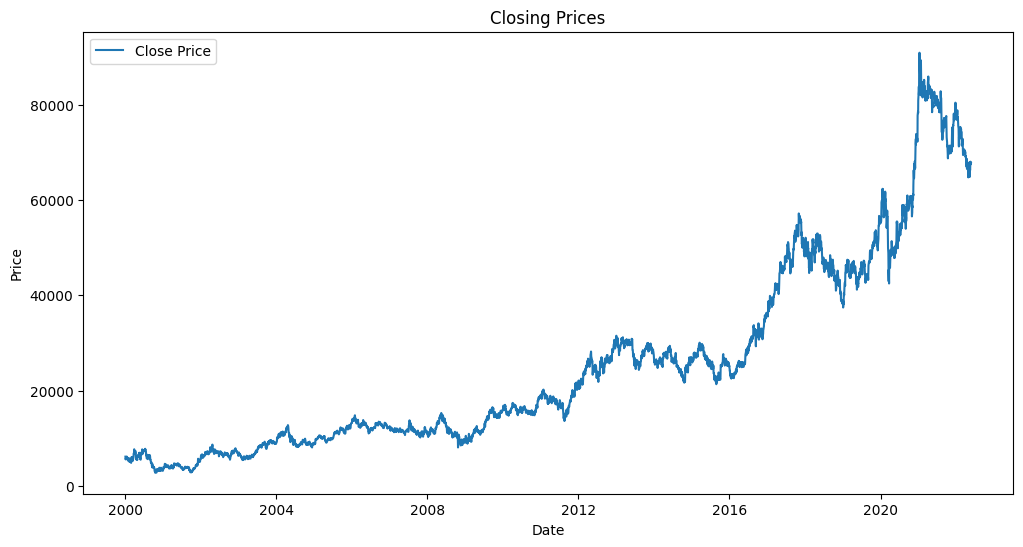

In [18]:
# 기본 통계 분석 

# 장 마감 가격 시계열 그래프 

plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

- 장 마감 주가 시계열 그래프로 확인해본 결과 점차 증가하는 추세를 확인 가능

- 2016년과 202년 사이 주가가 급락했던 시점이 생기는데 2018~2019년 사이

- 코로나로 인한 펜데믹으로 주가가 하락했다가 전 세계적 규제 완화로 인한 주가 상승

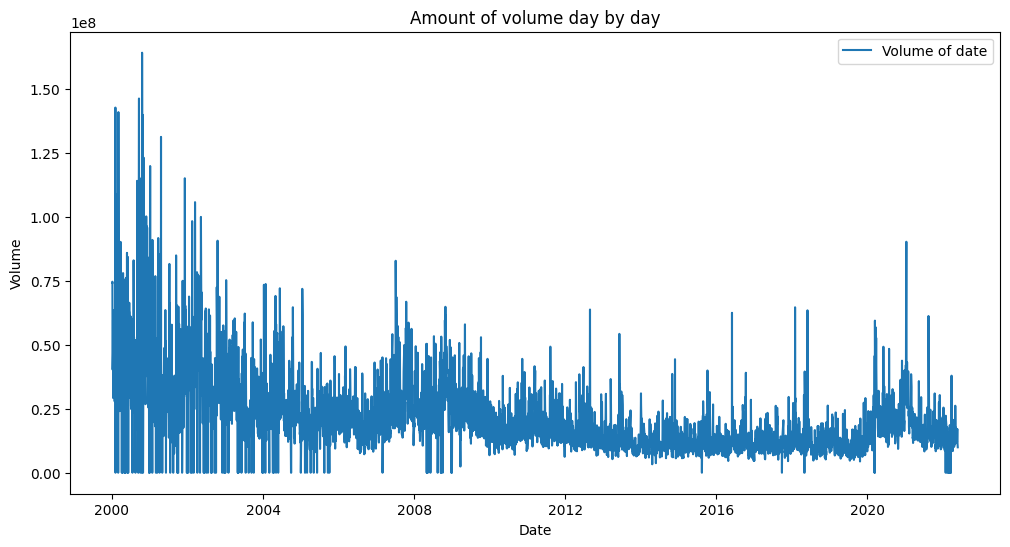

In [19]:
# 일자별 거래량 히스토그램 
# y값이 왜 소수점 단위인지 해결
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Volume'], label='Volume of date')
plt.title('Amount of volume day by day')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

- 2001~2년이 제일 많은 거래량을 가지고 있음

- 2004년 이후 거래량은 안정적인 형태를 보여가고 있음

- 마찬가지로 펜데믹 규제 완화 영향이 미친 2020년 이후 거래량이 증가한 일자 확인  

In [20]:
# 가설 검증 

# 1. 전일 주가 변동 폭은 다음날 주가 변동에 유의미한 영향을 미친다. 

In [21]:
# 가설 검증 

# 2. 특정 주가 패턴이 발생한 후 다음날 주가는 일정한 가격 경향을 보인다.  

In [22]:
# 가설 검증 

# 3. 매 분기 별 마지막 주가 변동 패턴이 분기내의 매 달 마무리의 주가 변동과 다르다.